<a href="https://colab.research.google.com/github/vyom-verma/1D_cnn/blob/main/1DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [282]:
rating=pd.read_excel('/content/online_ratings.xls')
video=pd.read_excel('/content/video_list.xls')
rating.head()

,Online_id,Valence,Arousal,Dominance,Wheel_slice,Wheel_strength
0,1,4,4,3,11,3
1,1,8,3,3,3,4
2,1,5,1,1,3,2
3,1,5,3,5,3,1
4,1,7,1,7,7,1


In [283]:
video.isnull().count()

Online_id          120
Experiment_id      120
Lastfm_tag         120
Artist             120
Title              120
Youtube_link       120
Highlight_start    120
Num_ratings        120
VAQ_Estimate       120
VAQ_Online         120
AVG_Valence        120
STD_Valence        120
Q1_Valence         120
Q2_Valence         120
Q3_Valence         120
AVG_Arousal        120
STD_Arousal        120
Q1_Arousal         120
Q2_Arousal         120
Q3_Arousal         120
AVG_Dominance      120
STD_Dominance      120
Q1_Dominance       120
Q2_Dominance       120
Q3_Dominance       120
dtype: int64

In [284]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Online_id       1778 non-null   int64
 1   Valence         1778 non-null   int64
 2   Arousal         1778 non-null   int64
 3   Dominance       1778 non-null   int64
 4   Wheel_slice     1778 non-null   int64
 5   Wheel_strength  1778 non-null   int64
dtypes: int64(6)
memory usage: 83.5 KB


<ipython-input-285-32e22ce81568>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating['Valence'], hist=False)
<ipython-input-285-32e22ce81568>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating['Arousal'],hist=False)


<Axes: xlabel='Arousal', ylabel='Density'>

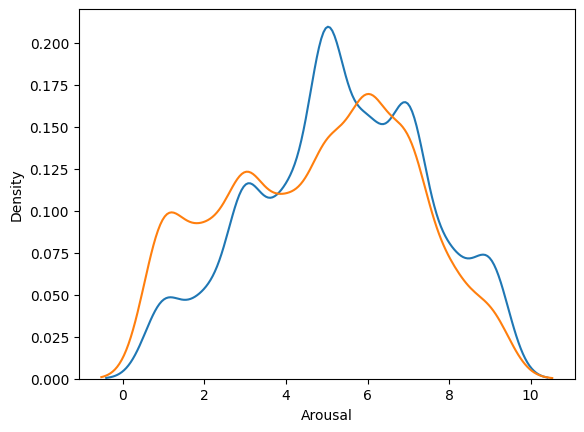

In [285]:
import seaborn as sns
sns.distplot(rating['Valence'], hist=False)
sns.distplot(rating['Arousal'],hist=False)

In [286]:
rating_grouped=rating.groupby('Online_id').mean().reset_index()
rating_grouped.shape

(120, 6)

In [287]:
dataset=video.merge(rating_grouped,on='Online_id')
df=dataset.drop(columns=['Artist','Experiment_id','Title','Youtube_link','Lastfm_tag','Highlight_start','Num_ratings','Online_id','Wheel_slice','Wheel_strength'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VAQ_Estimate   120 non-null    int64  
 1   VAQ_Online     120 non-null    int64  
 2   AVG_Valence    120 non-null    float64
 3   STD_Valence    120 non-null    float64
 4   Q1_Valence     120 non-null    float64
 5   Q2_Valence     120 non-null    float64
 6   Q3_Valence     120 non-null    float64
 7   AVG_Arousal    120 non-null    float64
 8   STD_Arousal    120 non-null    float64
 9   Q1_Arousal     120 non-null    float64
 10  Q2_Arousal     120 non-null    float64
 11  Q3_Arousal     120 non-null    float64
 12  AVG_Dominance  120 non-null    float64
 13  STD_Dominance  120 non-null    float64
 14  Q1_Dominance   120 non-null    float64
 15  Q2_Dominance   120 non-null    float64
 16  Q3_Dominance   120 non-null    float64
 17  Valence        120 non-null    float64
 18  Arousal   

In [288]:
X=df.drop(columns=['AVG_Dominance','STD_Dominance','Q1_Dominance','Q2_Dominance','Q3_Dominance','Valence','Arousal','Dominance'])
Y=df[['Valence','Arousal']]
y=Y['Valence']>Y['Arousal']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(y)
y=le.transform(y)
y=pd.DataFrame(y)
X.shape

(120, 12)

In [289]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
115,0
116,1
117,0
118,0


In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=43)


In [291]:
from sklearn.preprocessing import StandardScaler
X_train_Scaled=StandardScaler().fit_transform(X_train)
X_test_Scaled=StandardScaler().fit_transform(X_test)
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train.shape

(96, 12)

In [292]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Softmax,BatchNormalization

In [293]:
model=Sequential()
model.add(Conv1D(filters=3, activation='relu',padding='same',kernel_size=3, strides=2, input_shape=(12,1)))
model.add(MaxPooling1D(pool_size=2, strides = 2))
model.add(BatchNormalization())

model.add(Conv1D(filters=3, activation='relu',padding='same',kernel_size=3))
model.add(MaxPooling1D(pool_size=2, strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [294]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 6, 3)              12        
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 3, 3)             0         
 g1D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 3, 3)             12        
 chNormalization)                                                
                                                                 
 conv1d_27 (Conv1D)          (None, 3, 3)              30        
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 1, 3)             0         
 g1D)                                                            
                                                     

In [295]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [296]:
history = model.fit(X_train,y_train, epochs = 3500,validation_split=0.2,callbacks=callback,verbose=False)

Epoch 134: early stopping


Text(0.5, 1.0, 'Training and Validation loss')

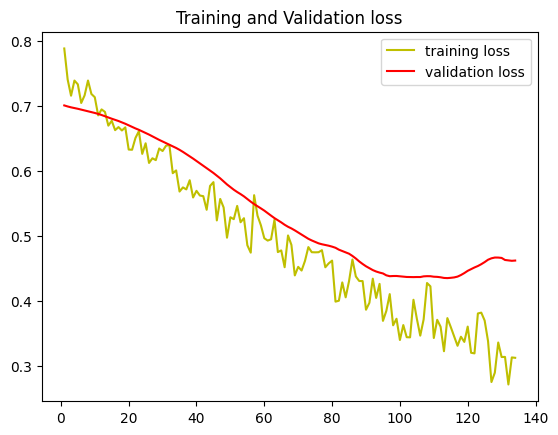

In [297]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'y', label='training loss')
plt.plot(epochs,val_loss,'r' , label='validation loss')
plt.legend()
plt.title('Training and Validation loss')



Text(0.5, 1.0, 'Training and Validation Accuracy')

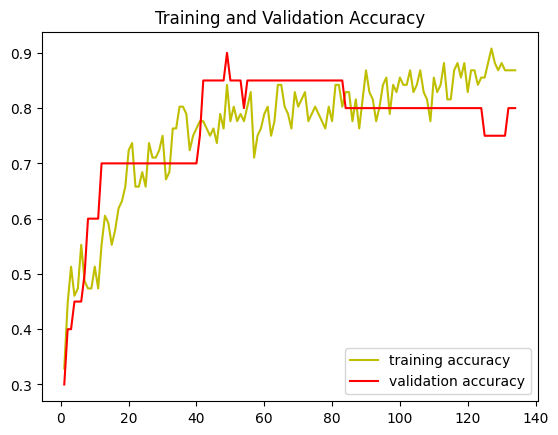

In [298]:

import matplotlib.pyplot as plt
a=history.history['accuracy']
val_a=history.history['val_accuracy']
epochs=range(1,len(loss)+1)

plt.plot(epochs,a,'y' , label='training accuracy')
plt.plot(epochs,val_a,'r' , label='validation accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


In [299]:
y_log=model.predict(X_test)

1/1 [==============================] - 0s 223ms/step


In [300]:
y_pred=np.where(y_log>0.5,1,0)
y_pred=pd.DataFrame(y_pred)

In [301]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9583333333333334